# Import Libraries

In [976]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [977]:
pd_options = {
'display.max_rows'    : 500,
'display.max_columns' : 500,
'display.width'       : 1000,
}

[pd.set_option(option, setting) for option, setting in pd_options.items()]

[None, None, None]

In [978]:
# show non scientific numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import dataset

In [979]:
df = pd.read_csv('loan.csv')

/var/folders/l0/y2ztlhpd3ksgsvm97s01txpm0000gn/T/ipykernel_23598/129683778.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


# Part I: Exploratory Data Analysis

## 1. Examining the dataset

The datset looks like below:

In [980]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,NaN,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

The dataset has 39,717 rows and 111 columns. And there are 3 data types: Float, Integer and Object

In [981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Primary columns of the dataset is 'id': A unique LC assigned ID for the loan listing 
and 'member_id': A unique LC assigned Id for the borrower member.


In [982]:
df['id'].nunique()

39717

In [983]:
df['member_id'].nunique()

39717

So that, there are 39717 loans in the dataset and each loan comes with an unique borrower.

## 2. Data Cleaning

### 1.1 Filtering Data (part 1)

*The aim of this analysis is to to identify patterns which indicate if a person is likely to default.*

There are some columns that is not meaningful when come our aim, so that there is a need of dropping those columns

In [984]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], dtype='object', length=111)

Column 
+ 'url': URL for the LC page with listing data 
+ 'desc': Loan description provided by the borrower 
+ 'emp_title': The job title supplied by the Borrower when applying for the loan 
+ 'zip_code': The first 3 numbers of the zip code provided by the borrower in the loan application
+ 'title': The loan title provided by the borrower 


 will be dropped. 




In [985]:
df = df.drop(columns = ['url', 'desc', 'zip_code', 'title'])

Next, we will examine duplicated records. If there are any duplicated records, it will add in bias over some specific set of values which is not beneficial when applying machine learning models.

In [986]:
len(df)-len(df.drop_duplicates())

0

There are no duplicate records in the dataset.

### 1.1. Missing values (part 1)

Let's check how many missing values are in the dataset

In [987]:
df.isnull().sum().sort_values(ascending = 0)

tot_coll_amt                      39717
total_rev_hi_lim                  39717
mo_sin_rcnt_rev_tl_op             39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
all_util                          39717
verification_status_joint         39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
mo_sin_rcnt_tl                    39717


There are 54 columns only contains null values

In [988]:
sum(((df.isnull().sum().sort_values(ascending = 0) / len(df) )*100) == 100)

54

Since there are no meaning to those columns, we will drop all-null columns out of the dataset for now.

In [989]:
df = df.dropna(axis = 1, how = 'all')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'], dtype='object')

So, after dropping all null columns, the dataset has 39717 rows and 57 columns.

In [990]:
df.shape

(39717, 53)

### 1.2 Invalid Values

In column 'int_rate' and 'revol_util', there are an unnecessary symbol '%'. So we need to take the symbol out.

In [991]:
df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate'] = df['int_rate'].astype('float64')

In [992]:
df['revol_util'] = df['revol_util'].str.replace('%','')
df['revol_util'] = df['revol_util'].astype('float64')

We examine the number of unqiue values of each columns. There are some columns only have one unique values, so that we will get rid of that

In [993]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
pymnt_plan                        1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
next_pymnt_d                      2
term                              2
verification_status               3
loan_status                       3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [994]:
for col in df.columns:
    if df[col].nunique() == 1:
        df = df.drop(col,axis=1)

In [995]:
df.nunique().sort_values()

next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     371
earliest_cr_line             526
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti       

There are 3 types of data in dataset: float64, int64 and object. Let's dive deep into each datatype!

In [996]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], dtype='object')

In [997]:
df.select_dtypes('float64').columns

Index(['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'], dtype='object')

In [998]:
df.select_dtypes('int64').columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'], dtype='object')

### 1.1 Filtering Data (part 2)

There are some need to first filtering columns based on business sense. There are 4 types of records in the dataset: _Loan accepted - Fully paid, Loan accepted - Current, loan accepted - Charged off (defaulted)_. So that, the records that does not end (current) is not in scope because those records do not have a clear status of 'default' or 'not-default'. So that, we need to separate those records for now.

In [999]:
df_current = df[df['loan_status'] == 'Current']
df_current.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
4,1075358,1311748,3000,3000,3000.000,60 months,12.690,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,other,OR,17.940,0,Jan-96,0,38.000,NaN,15,0,27783,53.900,38,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,Jun-16,May-16,0.000
32,1065420,1299514,10000,10000,9975.000,60 months,15.960,242.970,C,C5,US Legal Support,2 years,RENT,29120.000,Verified,Dec-11,Current,debt_consolidation,FL,22.830,0,Feb-97,1,68.000,NaN,11,0,16158,63.600,31,1849.100,1844.430,12594.240,12562.850,8150.890,4443.350,0.000,0.000,0.000,May-16,242.970,Jun-16,Apr-16,0.000
39,1069346,1304237,12500,12500,12475.000,60 months,12.690,282.440,B,B5,United States Infrastructure Corporation,1 year,RENT,27000.000,Verified,Dec-11,Current,debt_consolidation,IL,16.040,0,Dec-01,3,NaN,NaN,6,0,10143,50.000,24,2181.420,2177.030,14636.300,14607.080,10318.580,4317.720,0.000,0.000,0.000,May-16,282.440,Jun-16,May-16,0.000
86,1063958,1297940,14000,14000,13975.000,60 months,17.270,349.980,D,D3,community colleges of spokane,4 years,RENT,28000.000,Verified,Dec-11,Current,other,WA,6.340,0,Jul-05,2,NaN,NaN,5,0,6986,79.400,10,2637.340,2632.590,18176.960,18144.590,11362.670,6814.290,0.000,0.000,0.000,May-16,349.980,Jun-16,May-16,0.000
95,1068575,1303001,15300,15300,15275.000,60 months,22.060,423.100,F,F4,OSSI,6 years,RENT,85000.000,Verified,Dec-11,Current,credit_card,VA,20.580,0,Feb-84,2,56.000,NaN,14,0,26524,89.700,27,3125.790,3120.680,21988.200,21952.280,12174.210,9813.990,0.000,0.000,0.000,May-16,423.100,Jun-16,May-16,0.000


In [1000]:
df = df[df['loan_status'] != 'Current']
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

So that, now our dataframe has 38577 rows and 43 columns

In [1001]:
df.shape

(38577, 44)

### 1.2 Missing values (part 2)

We will examine the missing values of the dataset. Here is the percentage of null values of each column:

In [1002]:
(df.isnull().sum().sort_values(ascending = 0) / len(df) )*100

next_pymnt_d              100.000
mths_since_last_record     92.897
mths_since_last_delinq     64.559
emp_title                   6.185
emp_length                  2.678
pub_rec_bankruptcies        1.807
last_pymnt_d                0.184
revol_util                  0.130
last_credit_pull_d          0.005
recoveries                  0.000
total_rec_late_fee          0.000
total_rec_int               0.000
last_pymnt_amnt             0.000
total_rec_prncp             0.000
total_pymnt_inv             0.000
collection_recovery_fee     0.000
out_prncp_inv               0.000
out_prncp                   0.000
total_acc                   0.000
revol_bal                   0.000
pub_rec                     0.000
open_acc                    0.000
total_pymnt                 0.000
id                          0.000
member_id                   0.000
earliest_cr_line            0.000
loan_amnt                   0.000
funded_amnt                 0.000
funded_amnt_inv             0.000
term          

Column 
+ 'next_pymnt_d': Next scheduled payment date
+ 'mths_since_last_record': The number of months since the last public record.

will be dropped out because there are more than 90% of values are null values.

In [1003]:
df = df.drop(columns = ['next_pymnt_d','mths_since_last_record'])

In [1004]:
df.isnull().sum().sort_values(ascending = 0)

mths_since_last_delinq     24905
emp_title                   2386
emp_length                  1033
pub_rec_bankruptcies         697
last_pymnt_d                  71
revol_util                    50
last_credit_pull_d             2
out_prncp_inv                  0
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
out_prncp                      0
last_pymnt_amnt                0
total_pymnt                    0
inq_last_6mths                 0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
total_pymnt_inv                0
id                             0
member_id                      0
sub_grade                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installmen

For missing values of column 'mths_since_last_delinq', all applicants has null values does not have any 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years and the past-due amount owed for the accounts on which the borrower is now delinquent is zero.



In [1005]:
df[df['mths_since_last_delinq'].isnull() == True]['delinq_2yrs'].unique()

array([0])

So, in business sense, the column 'mths_since_last_delinq' null values means there are no delinquency. But, in data analysis, we need to assign values to all these null values. So that, we will use an different values that could be distinguish by the computer/machine that run the models fromt the normal values of months. We will assign number '-1' for all the missing values.

In [1006]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)
df['mths_since_last_delinq'].unique()

array([ -1.,  35.,  61.,   8.,  20.,  18.,  45.,  38.,  48.,  41.,  40.,
        74.,  25.,  53.,  39.,  10.,  26.,  77.,  28.,  56.,  52.,  24.,
        16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  22.,  59.,
        79.,  44.,  57.,  14.,  63.,  49.,  15.,  73.,  70.,  29.,  51.,
         5.,  75.,  55.,   2.,  30.,  47.,  69.,   4.,  43.,  33.,  21.,
        27.,  46.,  81.,  68.,  78.,  82.,  31.,  64.,  76.,  62.,  72.,
        42.,  50.,   3.,  12.,  34.,  58.,  17.,  71.,  66.,  32.,   6.,
        80.,  36.,  37.,   7.,  67.,   1.,  83.,  86., 115.,  96., 120.,
       106.,  89., 103., 107.,  85.,  97.,  95.,   0.])

For 1033 missing values of columns 'emp_legth', after examine the column 'emp_title', there are 978 null values in 'emp_title' also. From that, we could assume that all missing values in 'emp_length' is because there are no information about employment. Hence, we will put all missing values of 'emp_length' into group 'non_info' and 'emp_title' to 'No information'.

In [1007]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [1008]:
df[df['emp_length'].isnull() == True]['emp_title'].isnull().sum()

978

In [1009]:
df['emp_length'] = df['emp_length'].fillna('non_info')
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       'non_info'], dtype=object)

In [1010]:
df['emp_title'] = df['emp_title'].fillna('No information')
df['emp_title'].value_counts()

No information                              2386
US Army                                      131
Bank of America                              107
IBM                                           65
AT&T                                          57
                                            ... 
Net Equity Financial                           1
Kernersville Fire Department                   1
The Keith Corp. (empl by county, now Kei       1
Bertie Middle School                           1
Evergreen Center                               1
Name: emp_title, Length: 28028, dtype: int64

For 697 missing values of 'pub_rec_bankruptcies' column, we will fill with number '0' represent that there are no bankruptcies records.

In [1011]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['pub_rec_bankruptcies'].value_counts()

0.000    36935
1.000     1637
2.000        5
Name: pub_rec_bankruptcies, dtype: int64

For 71 missing values of 'last_pymnt_d' column, these values means that there are no payment recorded in loan tenor time. So that, we will fill the issue date 

In [1012]:
df[df['last_pymnt_d'].isnull() == True]['last_pymnt_amnt'].value_counts()

0.000    71
Name: last_pymnt_amnt, dtype: int64

In [1013]:
df[df['last_pymnt_d'].isnull() == True]['loan_status'].value_counts()

Charged Off    71
Name: loan_status, dtype: int64

In [1014]:
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(df['issue_d'])

### 1.3 Standardise values (Outliers Handling)

Let's examine the distribution of each column:

In [1015]:
df = df.set_index(['id', 'member_id'])

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'mths_since_last_delinq'}>],
       [<Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>],
       [<Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>,
        <Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>],
       [<Axes: t

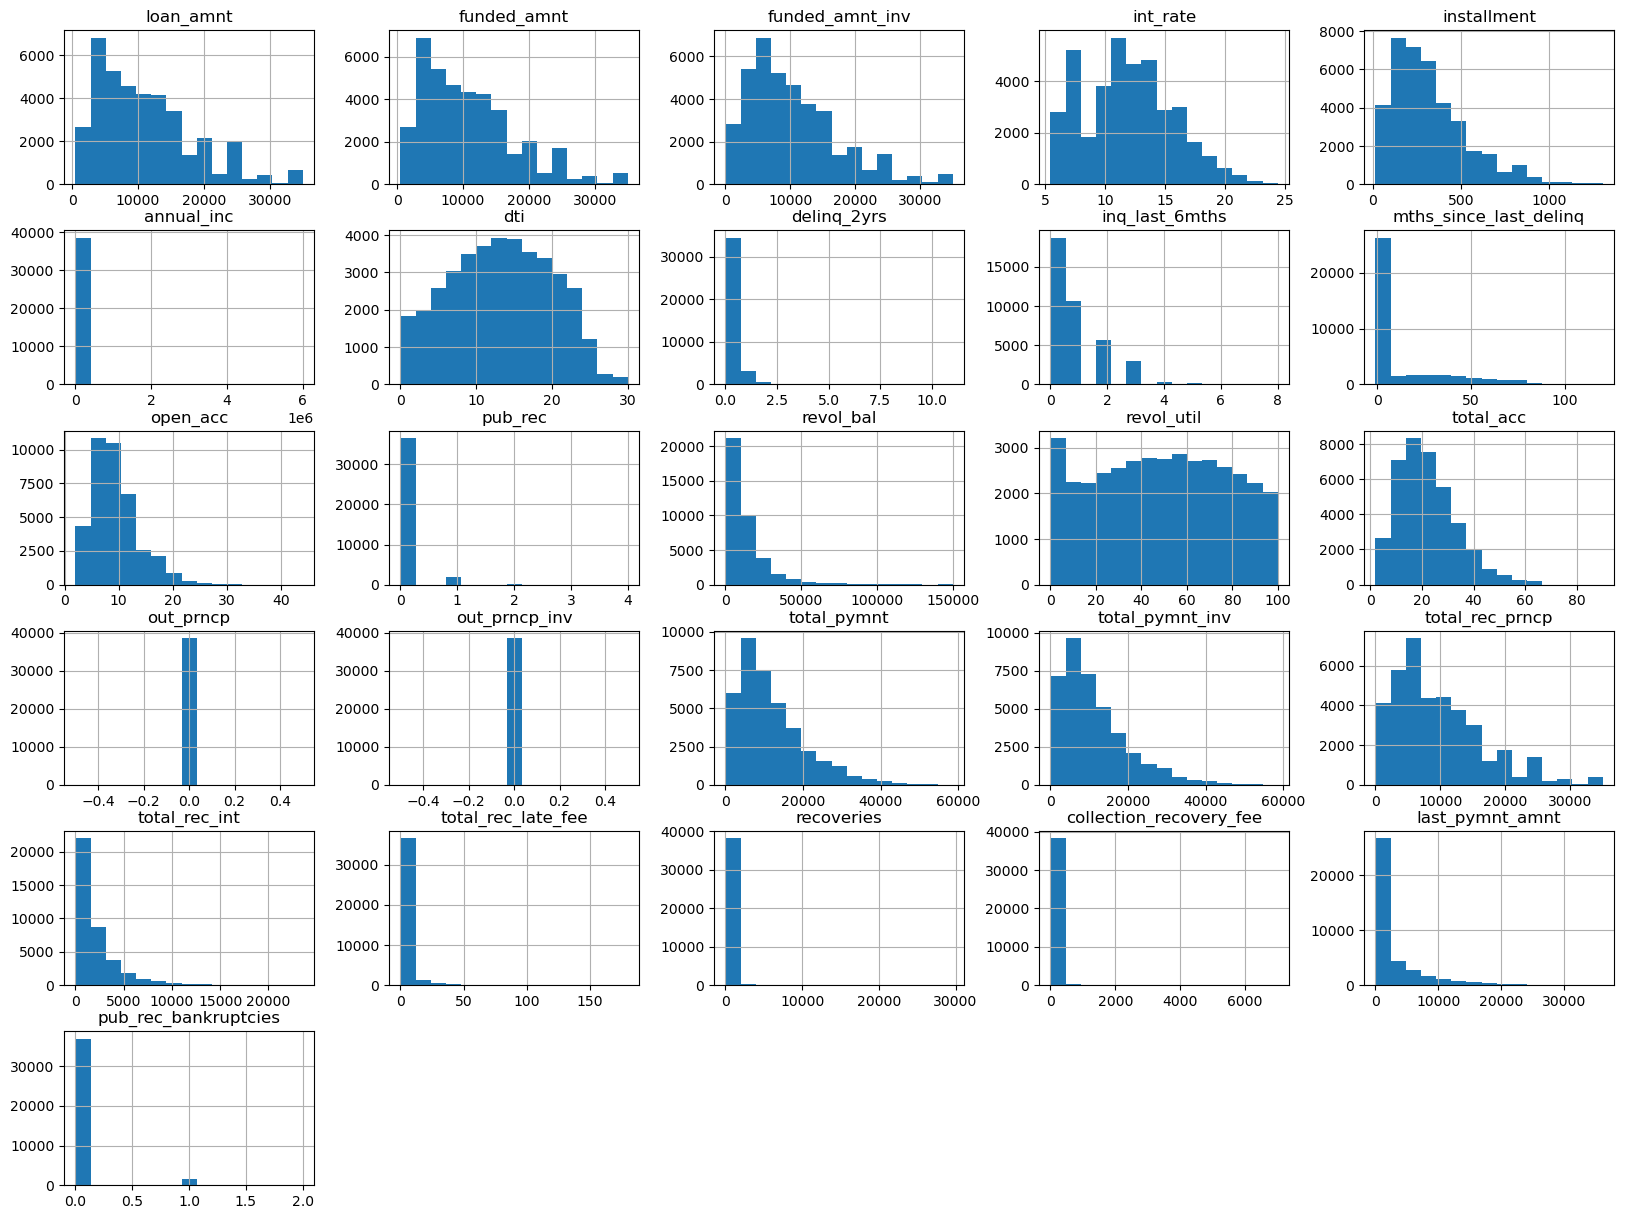

In [1016]:
df.hist(bins=15, figsize=(20, 15))

In [1017]:
df.describe(percentiles= (0.15, 0.25, 0.5, 0.75, 0.9, 0.95))

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38527.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000
mean,11047.025,10784.059,10222.481,11.932,322.466,68777.974,13.273,0.147,0.872,12.071,9.275,0.055,13289.490,48.703,22.053,0.000,0.000,11866.970,11271.196,9648.323,2119.243,1.369,98.036,12.773,2746.243,0.043
std,7348.442,7090.306,7022.721,3.691,208.639,64218.682,6.673,0.492,1.072,21.982,4.402,0.238,15866.492,28.365,11.426,0.000,0.000,8809.856,8700.846,7009.381,2389.500,7.316,698.650,150.837,4494.648,0.203
min,500.000,500.000,0.000,5.420,15.690,4000.000,0.000,0.000,0.000,-1.000,2.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
15%,4000.000,4000.000,3600.000,7.510,124.410,34000.000,5.550,0.000,0.000,-1.000,5.000,0.000,1945.000,14.300,10.000,0.000,0.000,3764.477,3317.422,3000.000,425.036,0.000,0.000,0.000,138.704,0.000
25%,5300.000,5200.000,5000.000,8.940,165.740,40000.000,8.130,0.000,0.000,-1.000,6.000,0.000,3650.000,25.200,13.000,0.000,0.000,5513.497,5019.590,4500.000,643.990,0.000,0.000,0.000,217.420,0.000
50%,9600.000,9550.000,8733.440,11.710,277.860,58868.000,13.370,0.000,1.000,-1.000,9.000,0.000,8762.000,49.100,20.000,0.000,0.000,9674.048,9066.660,8000.000,1300.450,0.000,0.000,0.000,568.260,0.000
75%,15000.000,15000.000,14000.000,14.380,425.550,82000.000,18.560,0.000,1.000,21.000,12.000,0.000,16912.000,72.300,29.000,0.000,0.000,16136.952,15329.780,13175.000,2671.980,0.000,0.000,0.000,3447.250,0.000
90%,21600.000,20000.000,19975.000,16.820,620.900,115000.000,22.290,1.000,2.000,49.000,15.000,0.000,28972.000,87.800,38.000,0.000,0.000,24144.089,23375.242,20000.000,4889.208,0.000,16.204,0.000,8516.180,0.000
95%,25000.000,25000.000,24500.067,18.312,760.820,140004.000,23.800,1.000,3.000,64.000,17.000,1.000,41356.200,93.570,43.000,0.000,0.000,29620.756,28989.590,24280.000,6862.398,14.930,381.768,5.420,12370.088,0.000


For 'recoveries' and 'collection_recovery_fee' column, there are big difference between min value, 95 percentile and max value. But the frequency of each big values is not small enough to consider outliers. 

### Final dataset after performing Data cleaning

In [1018]:
df.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,No information,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.650,0,Jan-85,1,-1.000,3,0,13648,83.700,9,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000
1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,-1.000,3,0,1687,9.400,4,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000
1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,No information,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.720,0,Nov-01,2,-1.000,2,0,2956,98.500,10,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,May-16,0.000
1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,CA,20.000,0,Feb-96,1,35.000,10,0,5598,21.000,37,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000
1075269,1311441,5000,5000,5000.000,36 months,7.900,156.460,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.200,0,Nov-04,3,-1.000,9,0,7963,28.300,12,0.000,0.000,5632.210,5632.210,5000.000,632.210,0.000,0.000,0.000,Jan-15,161.030,Jan-16,0.000


In [1019]:
df.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
mths_since_last_delinq      0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_

## 2. Univariate Analysis and Segmented Univariate Analysis

Here is the dataset after performing Data Cleaning:

In [1020]:
df.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,No information,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.650,0,Jan-85,1,-1.000,3,0,13648,83.700,9,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000
1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,-1.000,3,0,1687,9.400,4,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000
1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,No information,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.720,0,Nov-01,2,-1.000,2,0,2956,98.500,10,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,May-16,0.000
1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,CA,20.000,0,Feb-96,1,35.000,10,0,5598,21.000,37,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000
1075269,1311441,5000,5000,5000.000,36 months,7.900,156.460,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.200,0,Nov-04,3,-1.000,9,0,7963,28.300,12,0.000,0.000,5632.210,5632.210,5000.000,632.210,0.000,0.000,0.000,Jan-15,161.030,Jan-16,0.000


First, examine the loan_status, the label column of the dataset:

<Axes: title={'center': 'Loan Status'}>

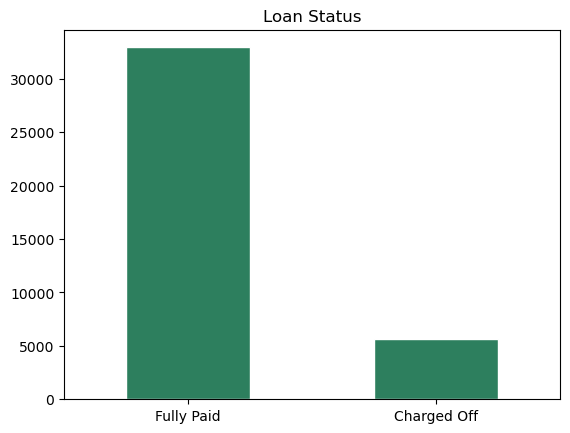

In [1021]:
df['loan_status'].value_counts().plot(kind='bar',color='#2d7f5e', edgecolor='white', rot=0, title = 'Loan Status')

There are 14.5% of the loan records are defaulted, which is a moderate case of imbalanced dataset (mild: 20%-40%, moderate: 1%-20%, extreme: <1%)

In [1022]:
(df['loan_status'].value_counts() / len(df))*100

Fully Paid    85.414
Charged Off   14.586
Name: loan_status, dtype: float64

Next is column 'term', the proportion of default loan is higher in shorter term (36 months)

<Axes: xlabel='term', ylabel='count'>

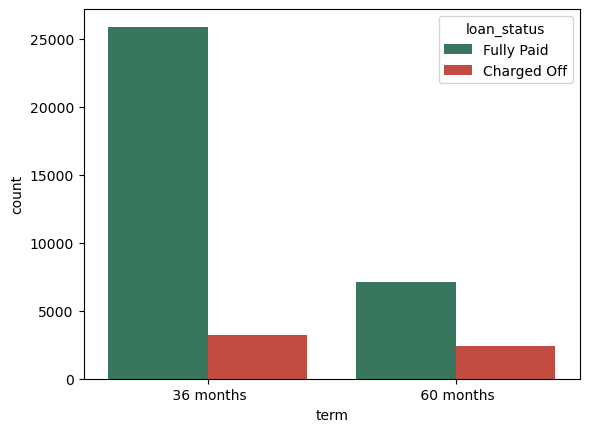

In [1023]:
sns.countplot(data=df, x='term', hue='loan_status', palette=['#2d7f5e', '#D83A2D'])

Examining the 'int_rate' column, the defaulted loans tend to have higher interest rate than non-defaulted loans.

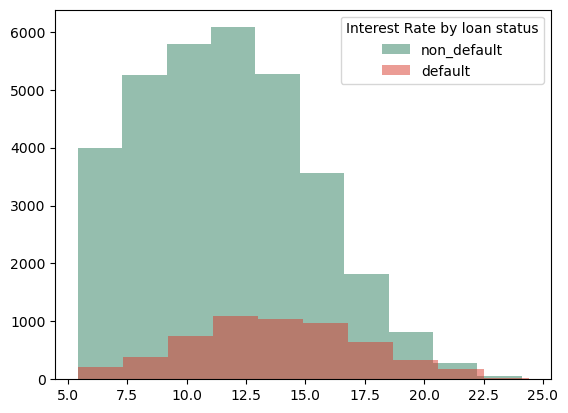

In [1024]:
#define int_rate values by loan_status group
default = df.loc[df['loan_status'] == 'Charged Off', 'int_rate']
non_default = df.loc[df['loan_status'] == 'Fully Paid', 'int_rate']

#add two histograms to one plot
plt.hist(non_default, alpha=0.5, label='non_default', color = '#2d7f5e')
plt.hist(default, alpha=0.5, label='default', color = '#D83A2D')


plt.legend(title='Interest Rate by loan status')
plt.show()

For column 'grade', better grade has better percentage of non-default loans.

<Axes: xlabel='grade', ylabel='count'>

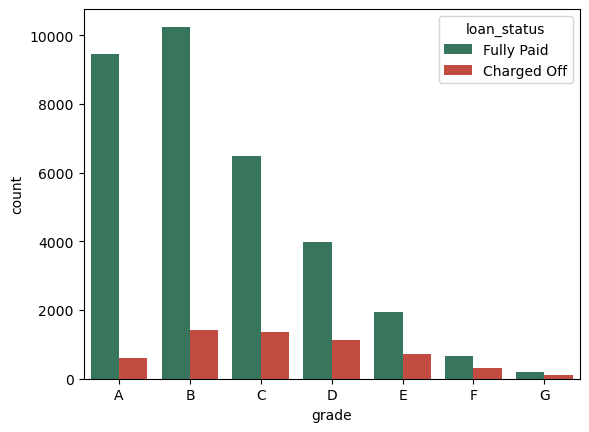

In [1025]:

sns.countplot(data=df, x='grade', hue='loan_status', palette=['#2d7f5e', '#D83A2D'], order = ['A', 'B', 'C', 'D', 'E', 'F','G'])

For 'home_ownership', *Mortgage* and *Rent* is the type that has the highest number of defaulted loan.

<Axes: xlabel='home_ownership', ylabel='count'>

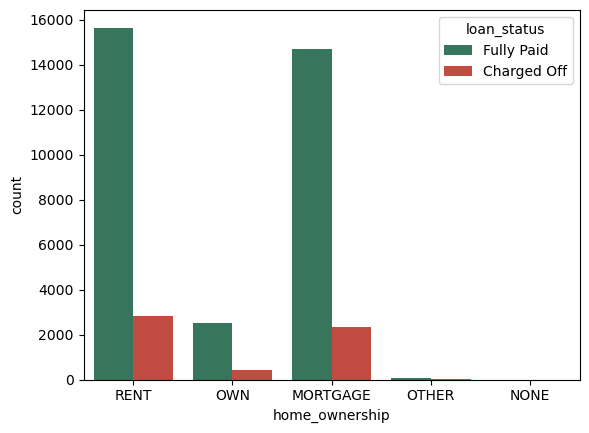

In [1026]:
sns.countplot(data=df, x='home_ownership', hue='loan_status', palette=['#2d7f5e', '#D83A2D'])

<Axes: xlabel='count', ylabel='purpose'>

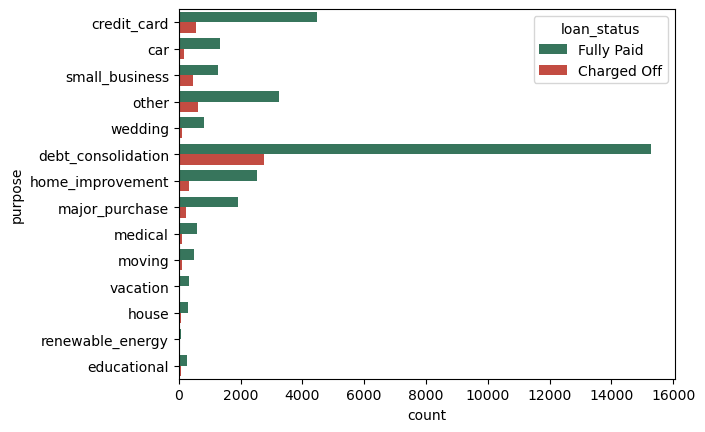

In [1027]:
sns.countplot(data=df, y='purpose', hue='loan_status', palette=['#2d7f5e', '#D83A2D'])

For 'emp_length' column, applicants that have no information of employment has the highest rate of defaulted loans; up next is >10 years and 7 years of employment.

<Axes: xlabel='count', ylabel='emp_length'>

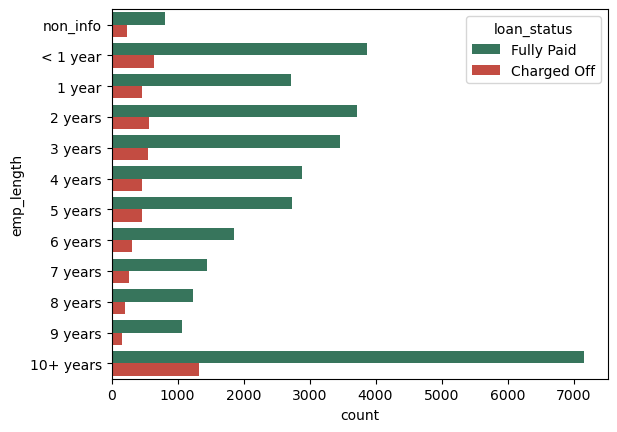

In [1029]:
sns.countplot(data=df, y='emp_length', hue='loan_status', palette=['#2d7f5e', '#D83A2D'], 
              order = ['non_info', '< 1 year', '1 year' , '2 years', '3 years', '4 years', '5 years'
                       , '6 years', '7 years', '8 years', '9 years', '10+ years'])

In [1035]:
df.groupby('emp_length')['loan_status'].value_counts(normalize = True).sort_values()

emp_length  loan_status
9 years     Charged Off   0.129
2 years     Charged Off   0.132
4 years     Charged Off   0.138
3 years     Charged Off   0.138
8 years     Charged Off   0.141
6 years     Charged Off   0.142
< 1 year    Charged Off   0.142
5 years     Charged Off   0.143
1 year      Charged Off   0.144
7 years     Charged Off   0.154
10+ years   Charged Off   0.157
non_info    Charged Off   0.221
            Fully Paid    0.779
10+ years   Fully Paid    0.843
7 years     Fully Paid    0.846
1 year      Fully Paid    0.856
5 years     Fully Paid    0.857
< 1 year    Fully Paid    0.858
6 years     Fully Paid    0.858
8 years     Fully Paid    0.859
3 years     Fully Paid    0.862
4 years     Fully Paid    0.862
2 years     Fully Paid    0.868
9 years     Fully Paid    0.871
Name: loan_status, dtype: float64

In [961]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], dtype='object')

## 3. Bivariate Analysis

## 4. Derived Metrics

### 2.1. Business driven

### 2.2. Type driven

### 2.3. Data driven

In [ ]:
# create a loan_default_flag column

# II. Data Preprocessing